In [174]:
import pandas as pd 
import numpy as np 
import seaborn as sns 

In [175]:
df = pd.read_csv('train (1).csv')

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


In [177]:
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [178]:
df.columns 

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')

In [179]:
df.duplicated().sum()

np.int64(0)

In [180]:
df['Name'].nunique()

1876

In [183]:
df['brand'].value_counts()

brand
maruti           1211
hyundai          1107
honda             608
toyota            411
mercedes-benz     318
volkswagen        315
ford              300
mahindra          272
bmw               267
audi              236
tata              186
skoda             173
renault           145
chevrolet         121
nissan             91
land               60
jaguar             40
fiat               28
mitsubishi         27
mini               26
volvo              21
porsche            18
jeep               15
datsun             13
force               3
isuzu               3
ambassador          1
smart               1
bentley             1
lamborghini         1
Name: count, dtype: int64

In [182]:
df['brand'] = df['Name'].apply(lambda x : x.split(' ')[0].lower())

In [184]:
freq = (df['brand'].value_counts()).to_frame().reset_index()

In [185]:
brand_100 = freq[freq['count'] < 100]['brand'].values

In [186]:
df['brand'] = df['brand'].apply(lambda x : 'other' if x in brand_100 else x )

In [187]:
df['brand'].value_counts()

brand
maruti           1211
hyundai          1107
honda             608
toyota            411
other             349
mercedes-benz     318
volkswagen        315
ford              300
mahindra          272
bmw               267
audi              236
tata              186
skoda             173
renault           145
chevrolet         121
Name: count, dtype: int64

In [188]:
df.columns = df.columns.str.lower()

In [189]:
df['location'].unique()

array(['Mumbai', 'Pune', 'Chennai', 'Coimbatore', 'Hyderabad', 'Jaipur',
       'Kochi', 'Kolkata', 'Delhi', 'Bangalore', 'Ahmedabad'],
      dtype=object)

In [190]:
df['location'].value_counts()

location
Mumbai        790
Hyderabad     742
Kochi         651
Coimbatore    636
Pune          622
Delhi         554
Kolkata       535
Chennai       494
Jaipur        413
Bangalore     358
Ahmedabad     224
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='year'>

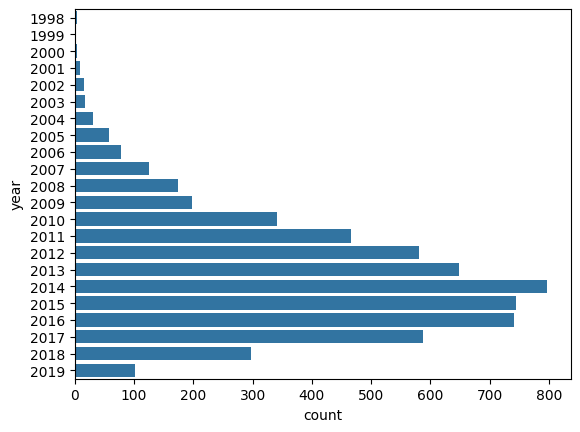

In [191]:
sns.countplot(y = df['year'])

In [192]:
from datetime import datetime

df['age'] = datetime.now().year - df['year']

In [193]:
df.drop(['year'] , axis = 1 , inplace = True )

<Axes: xlabel='kilometers_driven', ylabel='Density'>

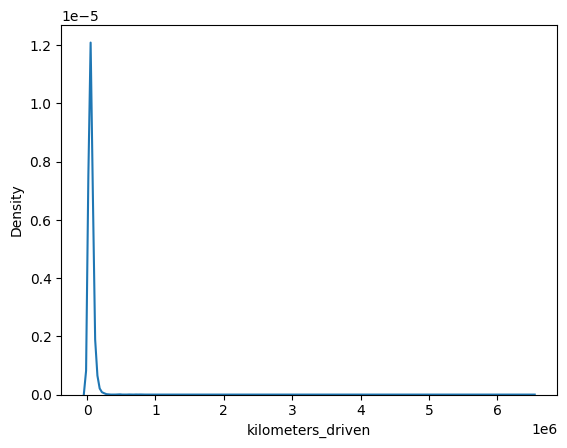

In [194]:
sns.kdeplot(df['kilometers_driven'])

In [195]:
df.describe()

,kilometers_driven,seats,price,age
count,6.019000e+03,5977.000000,6019.000000,6019.000000
mean,5.873838e+04,5.278735,9.479468,11.641801
std,9.126884e+04,0.808840,11.187917,3.269742
min,1.710000e+02,0.000000,0.440000,6.000000
25%,3.400000e+04,5.000000,3.500000,9.000000
50%,5.300000e+04,5.000000,5.640000,11.000000
75%,7.300000e+04,5.000000,9.950000,14.000000
max,6.500000e+06,10.000000,160.000000,27.000000


In [196]:
df[df['seats'] == 0]

,name,location,kilometers_driven,fuel_type,transmission,owner_type,mileage,engine,power,seats,new_price,price,brand,age
3999,Audi A4 3.2 FSI Tiptronic Quattro,Hyderabad,125000,Petrol,Automatic,First,10.5 kmpl,3197 CC,null bhp,0.0,NaN,18.0,audi,13


In [197]:
from datasist.structdata import detect_outliers

In [198]:
len(detect_outliers(df , 0 , ['kilometers_driven']))

202

In [199]:
df.drop(detect_outliers(df , 0 , ['kilometers_driven']) , axis = 0 , inplace = True )

In [200]:
import matplotlib.pyplot as plt 

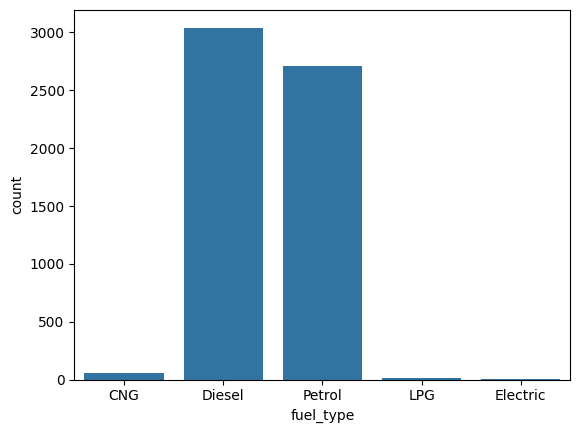

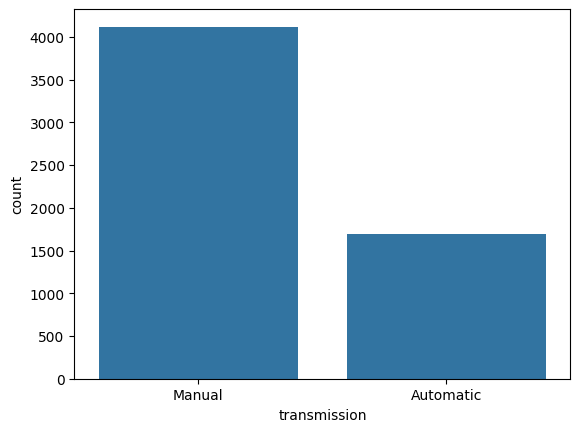

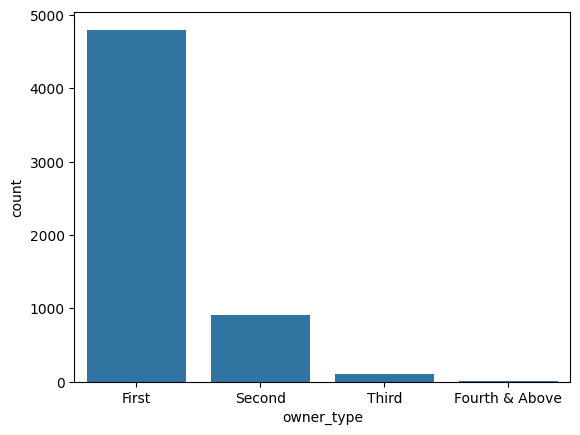

In [201]:
for col in ['fuel_type',	'transmission',	'owner_type'	]:

    plt.figure()
    sns.countplot(x=  df[col])

In [202]:
df['fuel_type'].unique()

array(['CNG', 'Diesel', 'Petrol', 'LPG', 'Electric'], dtype=object)

In [203]:
df.drop(df[df['fuel_type'].isin(['CNG' , 'LPG','Electric'])].index , axis = 0 , inplace = True )

In [204]:
df['owner_type'] = df['owner_type'].apply(lambda x : 'Non-First' if x != 'First' else x )

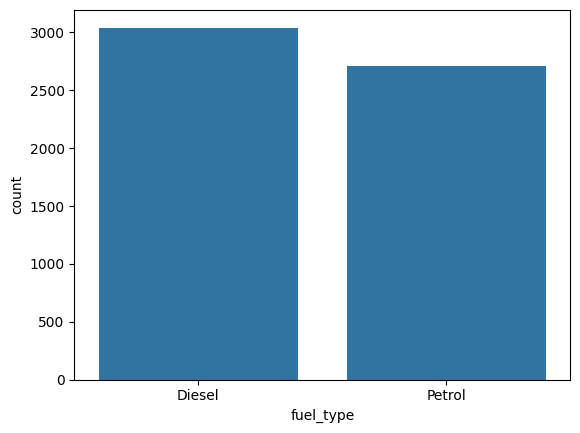

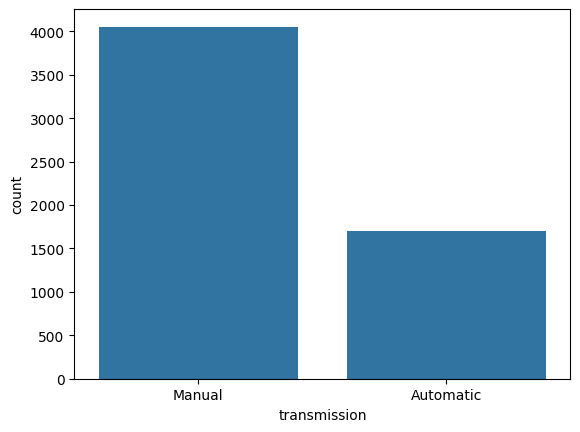

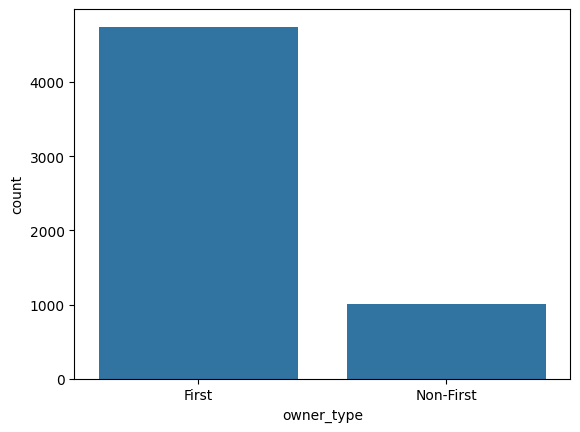

In [205]:
for col in ['fuel_type',	'transmission',	'owner_type'	]:

    plt.figure()
    sns.countplot(x=  df[col])

In [206]:
df['mileage'].apply(lambda x : len(x.split(' '))).unique()

array([2])

In [207]:
df['mileage'] = df['mileage'].apply(lambda x : float(x.split(' ')[0]))

In [208]:
df['engine'].isnull().sum()

np.int64(35)

In [209]:
df['engine'] = df['engine'].apply(lambda x : float(x.split(' ')[0]) if type(x) != float else x)

In [210]:
df['power'].isnull().sum()

np.int64(35)

In [211]:
def power(x):

    
    if pd.isna(x):
        return x
    var = x.split(' ')
    if var[0] == 'null' :
        return np.nan

    else :
        return float(var[0])

In [212]:
df['power'] = df['power'].apply(power)

In [213]:
df.rename(mapper = {
    'mileage' : 'mileage(km/l)',
    'power' : 'power(php)',
    'engine' : 'engine(cc)'
} , axis = 1 , inplace = True )

In [214]:
df['seats'].unique()

array([ 5.,  7.,  8.,  4.,  6.,  2., nan, 10.,  9.,  0.])

In [215]:
df[df['seats'].isnull()]

,name,location,kilometers_driven,fuel_type,transmission,owner_type,mileage(km/l),engine(cc),power(php),seats,new_price,price,brand,age
194,Honda City 1.5 GXI,Ahmedabad,60006,Petrol,Manual,First,0.00,NaN,NaN,NaN,NaN,2.95,honda,18
208,Maruti Swift 1.3 VXi,Kolkata,42001,Petrol,Manual,First,16.10,NaN,NaN,NaN,NaN,2.11,maruti,15
229,Ford Figo Diesel,Bangalore,70436,Diesel,Manual,First,0.00,1498.0,99.0,NaN,NaN,3.60,ford,10
733,Maruti Swift 1.3 VXi,Chennai,97800,Petrol,Manual,Non-First,16.10,NaN,NaN,NaN,NaN,1.75,maruti,19
749,Land Rover Range Rover 3.0 D,Mumbai,55001,Diesel,Automatic,Non-First,0.00,NaN,NaN,NaN,NaN,26.50,other,17
1294,Honda City 1.3 DX,Delhi,55005,Petrol,Manual,First,12.80,NaN,NaN,NaN,NaN,3.20,honda,16
1327,Maruti Swift 1.3 ZXI,Hyderabad,50295,Petrol,Manual,First,16.10,NaN,NaN,NaN,NaN,5.80,maruti,10
1385,Honda City 1.5 GXI,Pune,115000,Petrol,Manual,Non-First,0.00,NaN,NaN,NaN,NaN,1.50,honda,21
1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,69078,Petrol,Manual,First,0.00,NaN,NaN,NaN,NaN,40.88,other,17
1917,Honda City 1.5 EXI,Jaipur,88000,Petrol,Manual,Non-First,13.00,1493.0,100.0,NaN,NaN,1.70,honda,20


In [216]:
df.drop(['new_price'] , axis = 1 , inplace = True )

In [217]:
df.isnull().mean()*100

name                 0.000000
location             0.000000
kilometers_driven    0.000000
fuel_type            0.000000
transmission         0.000000
owner_type           0.000000
mileage(km/l)        0.000000
engine(cc)           0.608802
power(php)           2.330840
seats                0.713168
price                0.000000
brand                0.000000
age                  0.000000
dtype: float64

In [218]:
df.dropna(axis = 0 , inplace = True , ignore_index=True )

In [219]:
df['seats'].unique()

array([ 5.,  7.,  8.,  4.,  6.,  2., 10.,  9.])

<Axes: xlabel='seats', ylabel='count'>

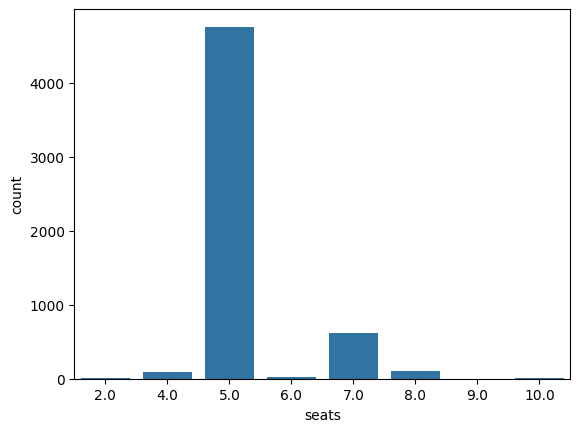

In [220]:
sns.countplot(x = df['seats'])

In [221]:
df.dtypes

name                  object
location              object
kilometers_driven      int64
fuel_type             object
transmission          object
owner_type            object
mileage(km/l)        float64
engine(cc)           float64
power(php)           float64
seats                float64
price                float64
brand                 object
age                    int64
dtype: object

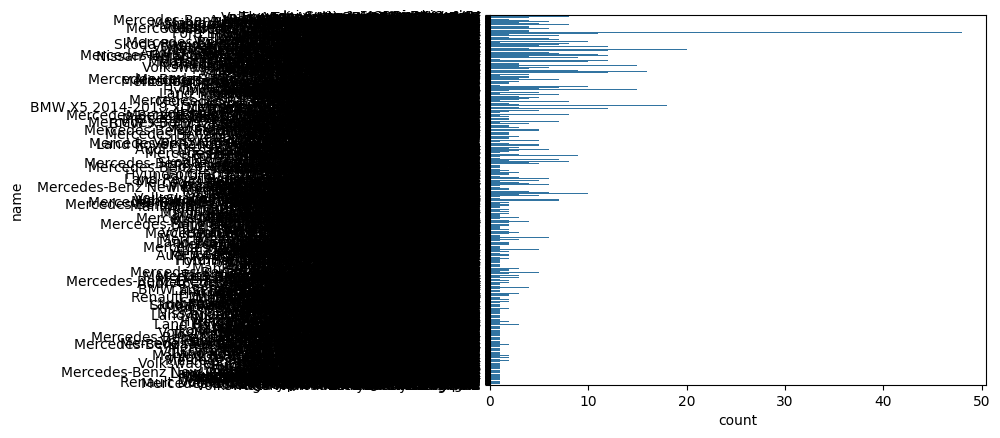

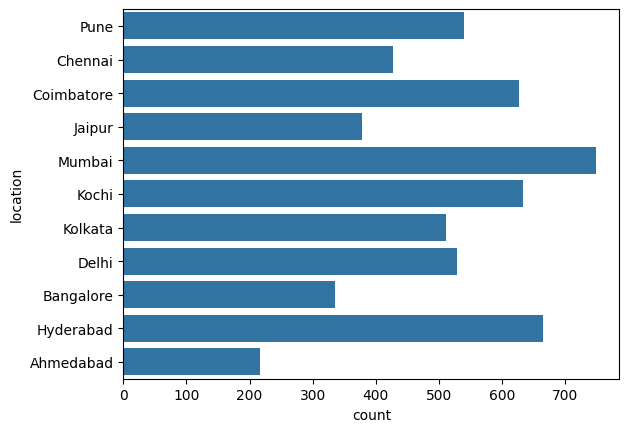

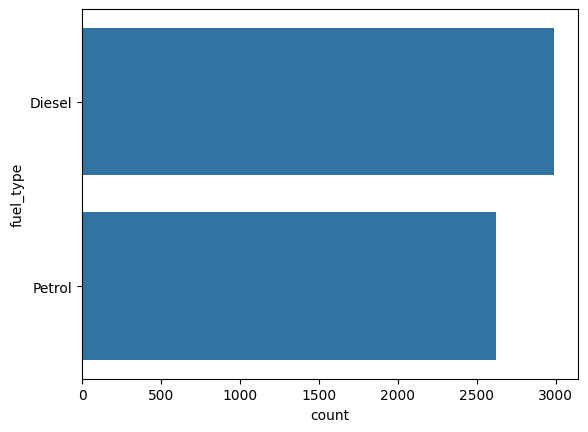

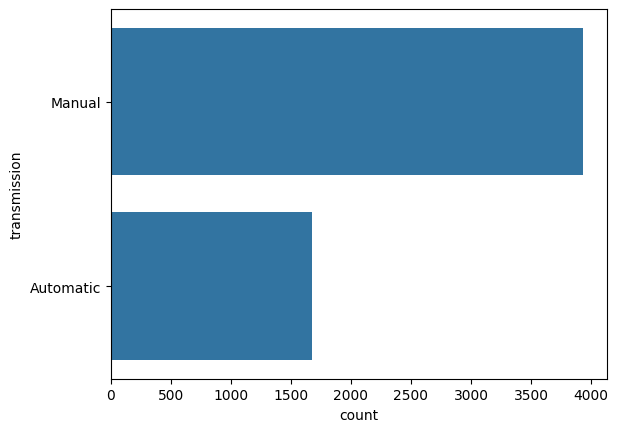

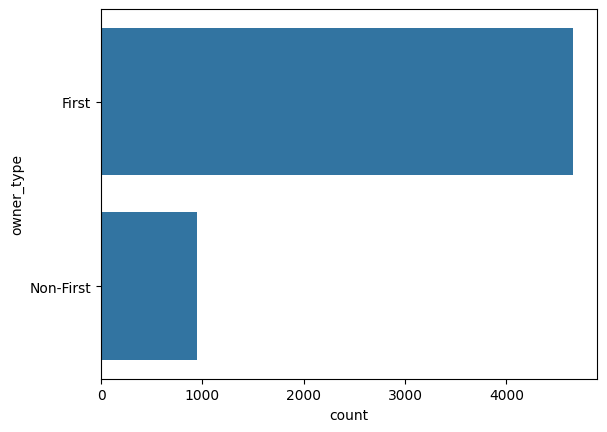

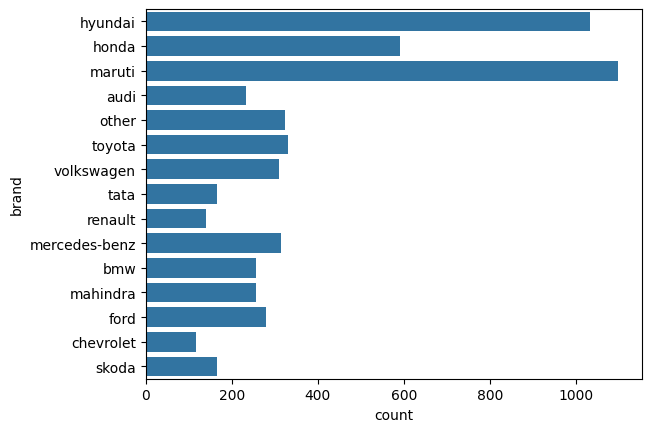

In [222]:
for col in df.select_dtypes('O').columns :
    plt.figure()
    sns.countplot(y = df[col])

In [223]:
df.drop(['name'] , axis = 1 , inplace = True )

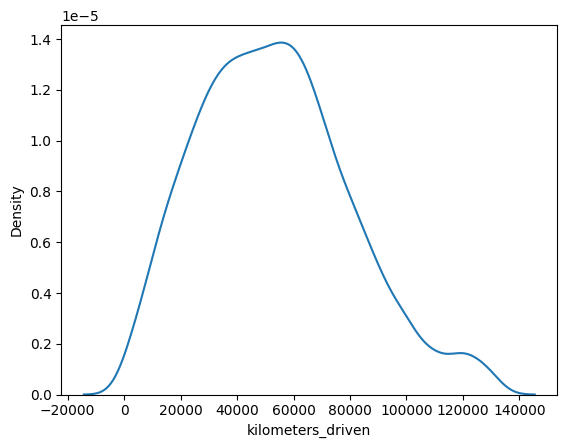

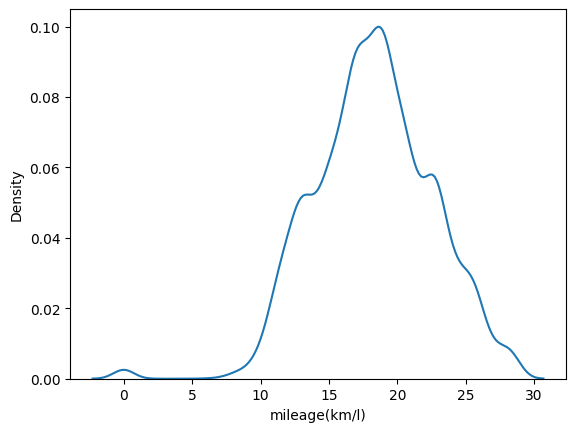

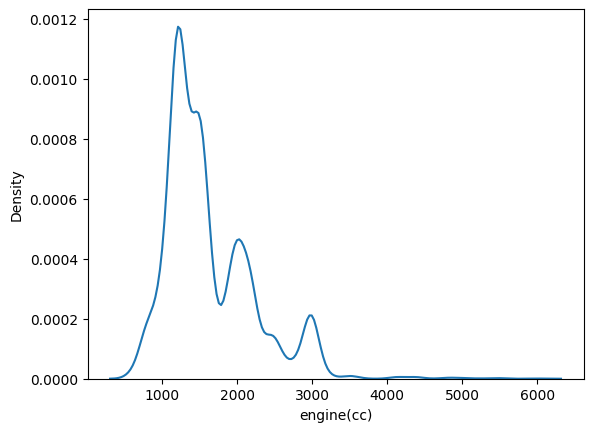

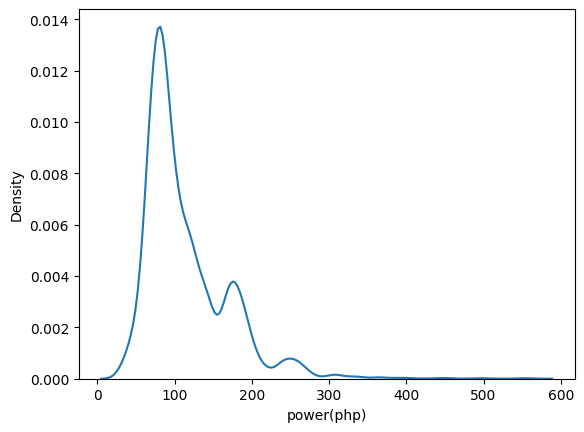

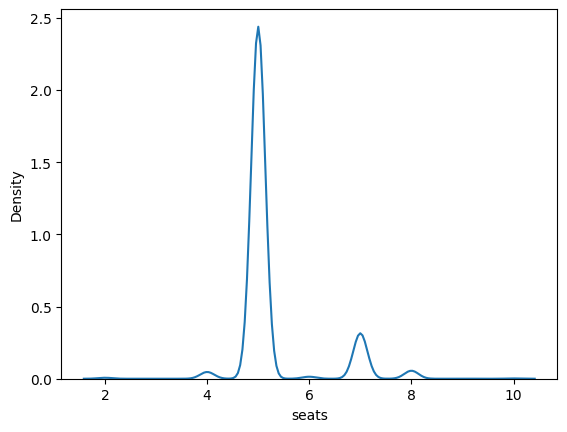

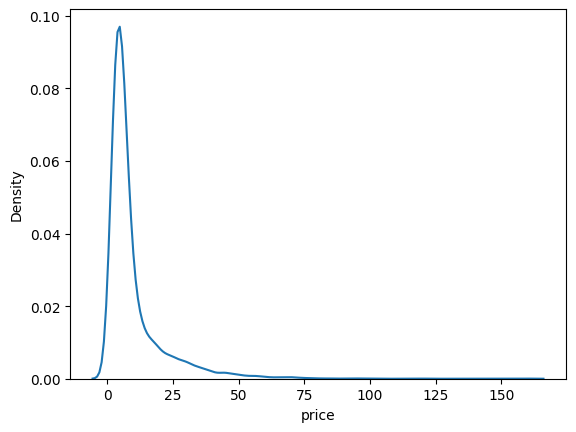

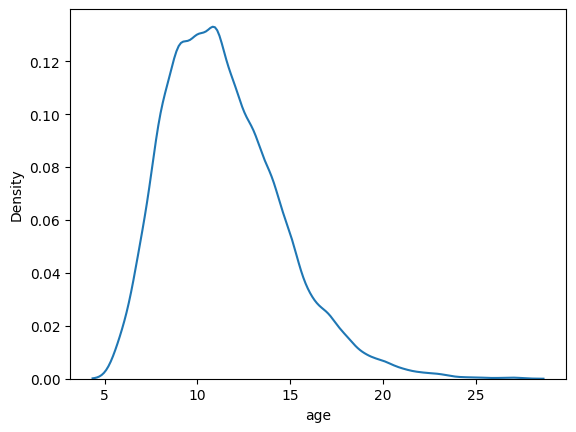

In [224]:
for col in df.select_dtypes('number').columns :
    plt.figure()
    sns.kdeplot(x = df[col])

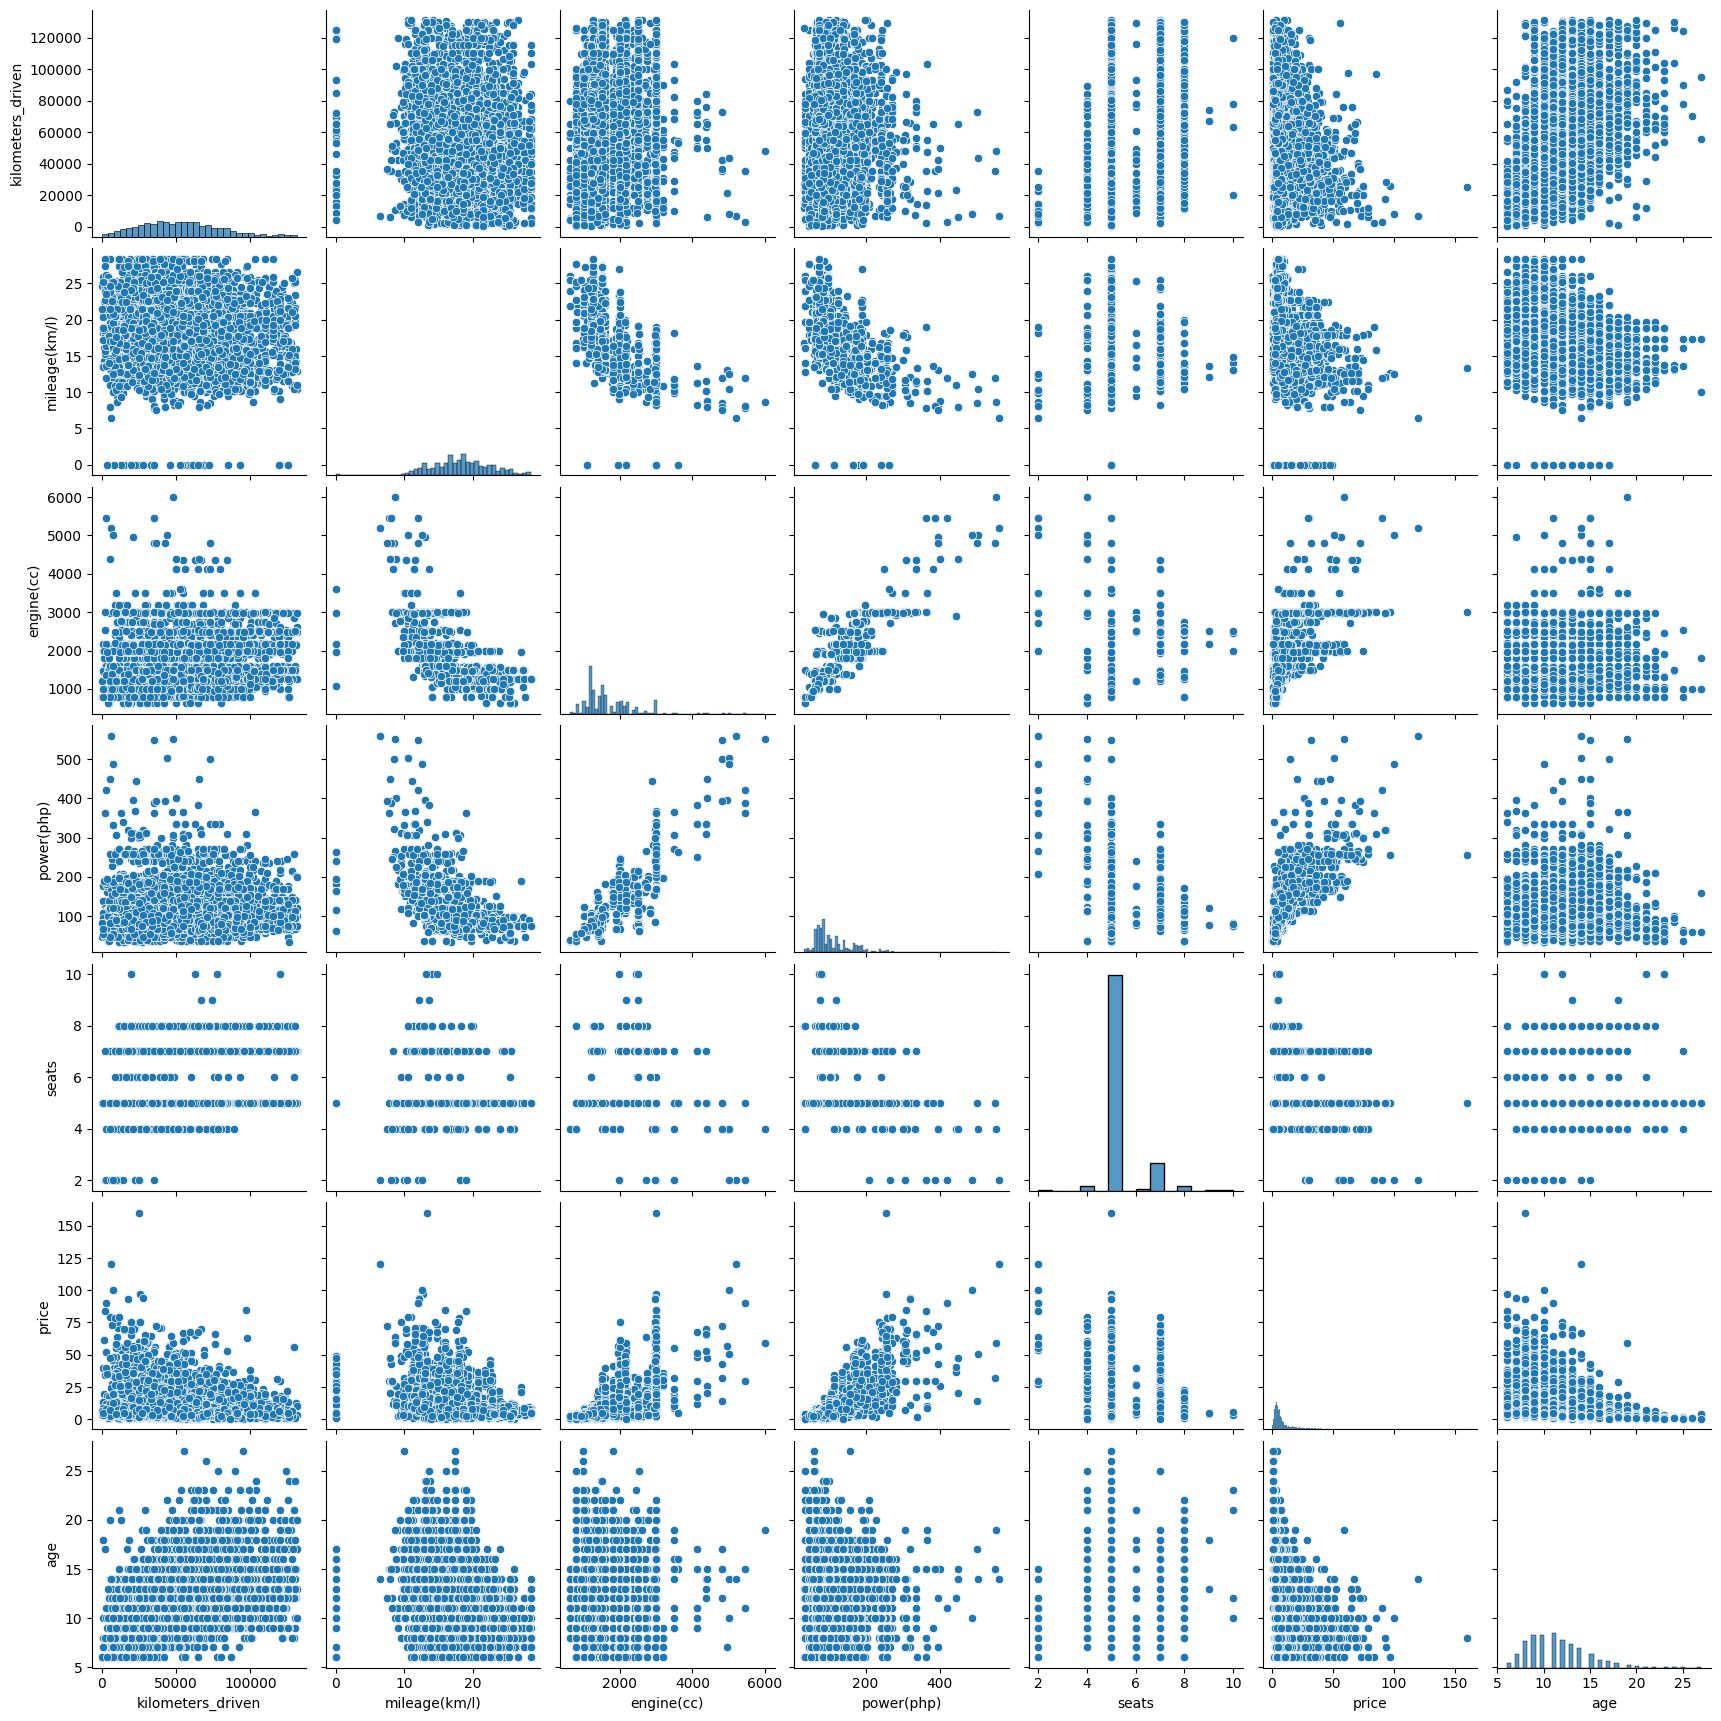

In [225]:
sns.pairplot(df.select_dtypes('number'))

<Axes: >

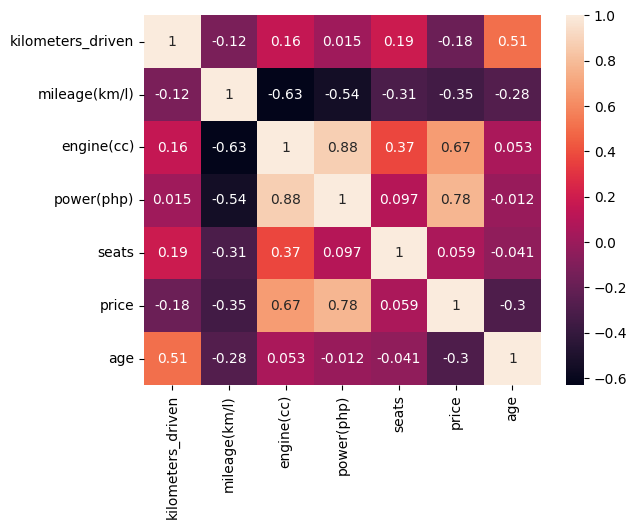

In [226]:
sns.heatmap(df.select_dtypes('number').corr(), annot = True )

In [231]:
df.drop(df[df['mileage(km/l)'] == 0].index , axis = 0 , inplace = True )

In [232]:
for col in df.select_dtypes('O').columns :
    print(f'{col} -- {df[col].nunique()}')

location -- 11
fuel_type -- 2
transmission -- 2
owner_type -- 2
brand -- 15


In [233]:
df.reset_index(inplace = True , drop = True )

In [234]:
from sklearn.preprocessing import OneHotEncoder , StandardScaler , PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , Lasso , Ridge
from sklearn.metrics import r2_score , mean_squared_error

In [235]:
ohe = OneHotEncoder(sparse_output=False , drop = 'first')

col_ohe = ['fuel_type' ,'transmission','owner_type']

df_ohe = pd.DataFrame(ohe.fit_transform(df[col_ohe]) , columns=ohe.get_feature_names_out())
df_ohe.head()

,fuel_type_Petrol,transmission_Manual,owner_type_Non-First
0,0.0,1.0,0.0
1,1.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,0.0,1.0
4,0.0,1.0,0.0


In [236]:
be = BinaryEncoder()

col_be = ['location' , 'brand']

df_be = be.fit_transform(df[col_be])
df_be.head()

,location_0,location_1,location_2,location_3,brand_0,brand_1,brand_2,brand_3
0,0,0,0,1,0,0,0,1
1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,0,1,1
3,0,0,1,1,0,1,0,0
4,0,1,0,0,0,1,0,1


In [237]:
df = pd.concat([df , df_ohe , df_be] , axis = 1 ).drop(col_be + col_ohe , axis = 1 )

In [238]:
col_be + col_ohe

['location', 'brand', 'fuel_type', 'transmission', 'owner_type']

In [247]:
x , y = df.drop(['price'], axis = 1 ) , np.log(df['price'])

In [248]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 , random_state=0)

In [249]:
sclr = StandardScaler()

x_train = sclr.fit_transform(x_train)
x_test = sclr.transform(x_test)

In [250]:
lr = LinearRegression()

lr.fit(x_train , y_train)

y_train_prd = lr.predict(x_train)
y_test_prd = lr.predict(x_test)

print(f'Train score : {r2_score(y_true=y_train , y_pred=y_train_prd)}')
print(f'Test score : {r2_score(y_true=y_test , y_pred=y_test_prd)}')

print(f'Train score : {mean_squared_error(y_true=y_train , y_pred=y_train_prd)}')
print(f'Test score : {mean_squared_error(y_true=y_test , y_pred=y_test_prd)}')

Train score : 0.8835842732620769
Test score : 0.898164843321929
Train score : 0.08659587772125586
Test score : 0.07374635502773708


In [255]:
poly = PolynomialFeatures(degree=2)

x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

In [256]:
lr = LinearRegression()

lr.fit(x_train_poly , y_train)

y_train_prd = lr.predict(x_train_poly)
y_test_prd = lr.predict(x_test_poly)

print(f'Train score : {r2_score(y_true=y_train , y_pred=y_train_prd)}')
print(f'Test score : {r2_score(y_true=y_test , y_pred=y_test_prd)}')

print(f'Train score : {mean_squared_error(y_true=y_train , y_pred=y_train_prd)}')
print(f'Test score : {mean_squared_error(y_true=y_test , y_pred=y_test_prd)}')

Train score : 0.9342283643288851
Test score : 0.9352049317883651
Train score : 0.048924253446656414
Test score : 0.046922892449485935


In [262]:
lasso = Lasso(alpha=1)

lasso.fit(x_train_poly , y_train)

y_train_prd = lasso.predict(x_train_poly)
y_test_prd = lasso.predict(x_test_poly)

print(f'Train score : {r2_score(y_true=y_train , y_pred=y_train_prd)}')
print(f'Test score : {r2_score(y_true=y_test , y_pred=y_test_prd)}')

print(f'Train score : {mean_squared_error(y_true=y_train , y_pred=y_train_prd)}')
print(f'Test score : {mean_squared_error(y_true=y_test , y_pred=y_test_prd)}')

Train score : 0.0
Test score : -0.000673028429639011
Train score : 0.7438503383327392
Test score : 0.7246612155224792


In [266]:
ridge = Ridge(alpha=0.1)

ridge.fit(x_train_poly , y_train)

y_train_prd = ridge.predict(x_train_poly)
y_test_prd = ridge.predict(x_test_poly)

print(f'Train score : {r2_score(y_true=y_train , y_pred=y_train_prd)}')
print(f'Test score : {r2_score(y_true=y_test , y_pred=y_test_prd)}')

print(f'Train score : {mean_squared_error(y_true=y_train , y_pred=y_train_prd)}')
print(f'Test score : {mean_squared_error(y_true=y_test , y_pred=y_test_prd)}')

Train score : 0.9342283066318642
Test score : 0.9352085363199303
Train score : 0.04892429636460502
Test score : 0.046920282142071536
